In [1]:
import os
from glob import glob
import warnings

import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs

import sa_utils as sau
import plotting_utils as pu

from utils import roar_code_path as project_code_path
from utils import roar_data_path as project_data_path
from utils import trend_metric_ids as metric_ids

In [2]:
# Set fonts
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_dirs = ["/storage/home/dcl5300/fonts"]

font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["axes.linewidth"] = 1.5

In [3]:
import importlib
importlib.reload(sau)

<module 'sa_utils' from '/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/src/sa_utils.py'>

In [5]:
ds = sau.read_all(
    metric_id="sum_pr",
    grid="LOCA2",
    regrid_method="nearest",
    proj_slice="2015-2100",
    hist_slice=None,
    stationary=None,
    fit_method=None,
    bootstrap=False,
    cols_to_keep=['slope'],
    analysis_type='trends',
    norm=True,
)

In [14]:
ds_slope = xr.open_dataset('/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/trends/original_grid/sum_pr/LOCA2_CanESM5_r1i1p1f1_ssp585_2015-2100_main.nc')
ds_norm = xr.open_dataset('/storage/group/pches/default/users/dcl5300/conus_comparison_lafferty-etal-2024/averages/original_grid/sum_pr/LOCA2_CanESM5_r1i1p1f1_ssp585_1950-2014.nc')

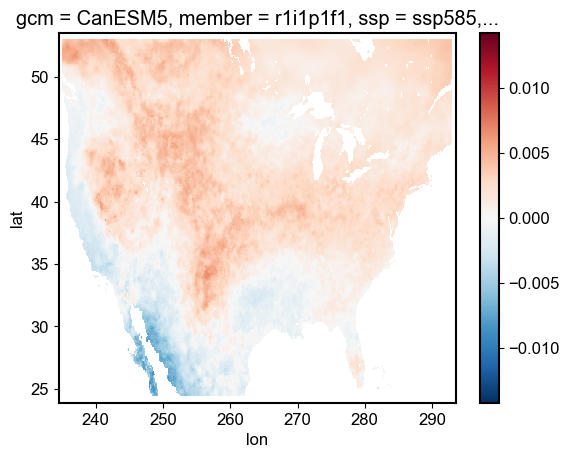

In [21]:
(ds_slope['slope']/ds_norm['pr']).plot()

In [22]:
ds[1]

<xarray.Dataset> Size: 165MB
Dimensions:   (gcm: 23, member: 1, ssp: 2, ensemble: 1, lon: 944, lat: 474)
Coordinates:
  * gcm       (gcm) <U16 1kB 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'NorESM2-MM'
  * member    (member) <U8 32B 'r1i1p1f1'
  * ssp       (ssp) <U6 48B 'ssp245' 'ssp585'
  * ensemble  (ensemble) <U9 36B 'STAR-ESDM'
  * lon       (lon) float64 8kB 234.5 234.6 234.7 234.7 ... 293.3 293.4 293.5
  * lat       (lat) float64 4kB 23.91 23.97 24.03 24.09 ... 53.34 53.41 53.47
Data variables:
    slope     (gcm, member, ssp, ensemble, lat, lon) float64 165MB nan ... nan

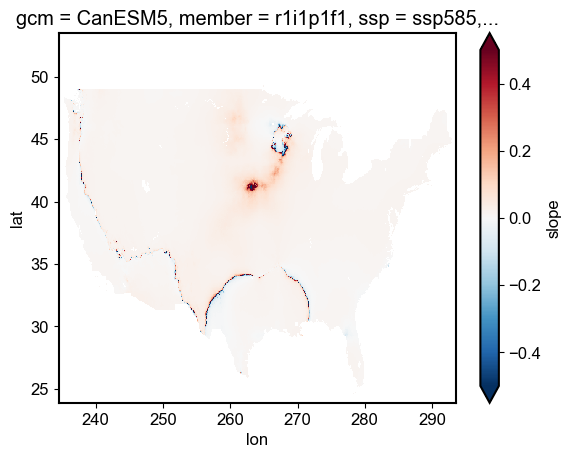

In [25]:
ds[1].sel(ssp='ssp585', gcm='CanESM5', member='r1i1p1f1')['slope'].plot(vmax=0.5)

In [5]:
regrid_method = "nearest"
col_name = "slope"
proj_slice = "2015-2100"
hist_slice = None
fit_method = None
stationary = None
n_boot_proj = 250

uc = sau.uc_all(metric_id='sum_pr',
                grid="LOCA2",
                fit_method=fit_method,
                stationary=stationary,
                regrid_method=regrid_method,
                proj_slice=proj_slice,
                hist_slice=hist_slice,
                norm = True,
                col_name_main=col_name,
                col_name_boot=col_name,
                n_boot_proj=n_boot_proj,
                analysis_type="trends")

/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/.venv/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/.venv/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


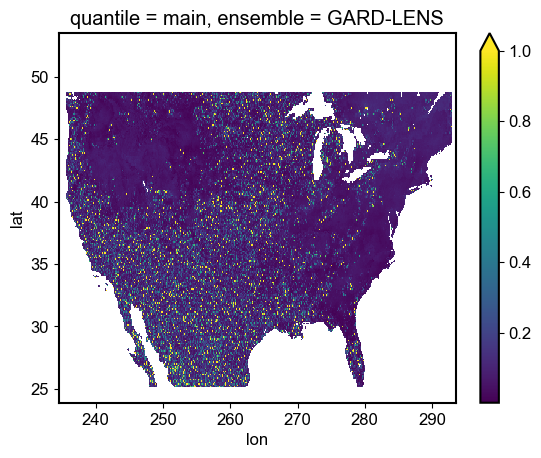

In [28]:
(uc['iv_uc']/uc['uc_99w_boot']).plot(vmax=1)

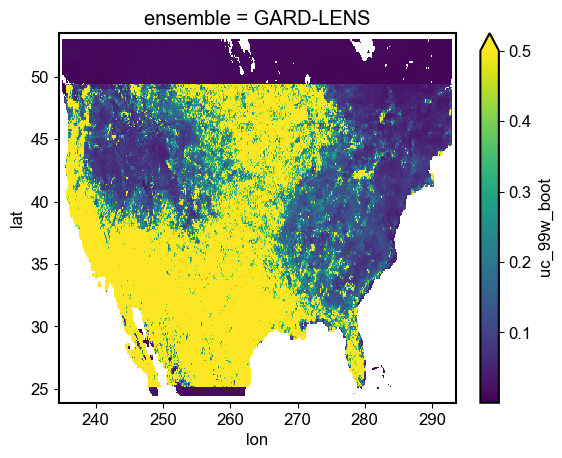

In [29]:
uc['uc_99w_boot'].plot(vmax=0.5)

## Analysis

In [5]:
# Calculate all and store
grids = ["LOCA2", "GARD-LENS"]
regrid_method = "nearest"
col_name = "slope"
proj_slice = "2015-2100"
hist_slice = None
fit_method = None
stationary = None
n_boot_proj = 250

# Loop through metrics
for metric_id in metric_ids[:3]:
    # Do for each grid
    for grid in grids:
        # Check if done
        save_file = f"{metric_id}_{proj_slice}_{hist_slice}_{col_name}_{grid}grid_{regrid_method}.nc"
        if os.path.exists(f"{project_data_path}/results/{save_file}"):
            print(f"Already done: {save_file}")
            continue
            
        # Calculate
        with warnings.catch_warnings():
            uc = sau.uc_all(metric_id=metric_id,
                            grid=grid,
                            fit_method=fit_method,
                            stationary=stationary,
                            regrid_method=regrid_method,
                            proj_slice=proj_slice,
                            hist_slice=hist_slice,
                            col_name_main=col_name,
                            col_name_boot=col_name,
                            n_boot_proj=n_boot_proj,
                            analysis_type="trends")
        # Store
        uc.to_netcdf(f"{project_data_path}/results/{save_file}")
        print(f"Done: {save_file}")
        del uc # memory management

Already done: avg_tas_2015-2100_None_slope_LOCA2grid_nearest.nc
Already done: avg_tas_2015-2100_None_slope_GARD-LENSgrid_nearest.nc
Already done: avg_tasmax_2015-2100_None_slope_LOCA2grid_nearest.nc
Already done: avg_tasmax_2015-2100_None_slope_GARD-LENSgrid_nearest.nc
Already done: avg_tasmin_2015-2100_None_slope_LOCA2grid_nearest.nc
Already done: avg_tasmin_2015-2100_None_slope_GARD-LENSgrid_nearest.nc


## Plots

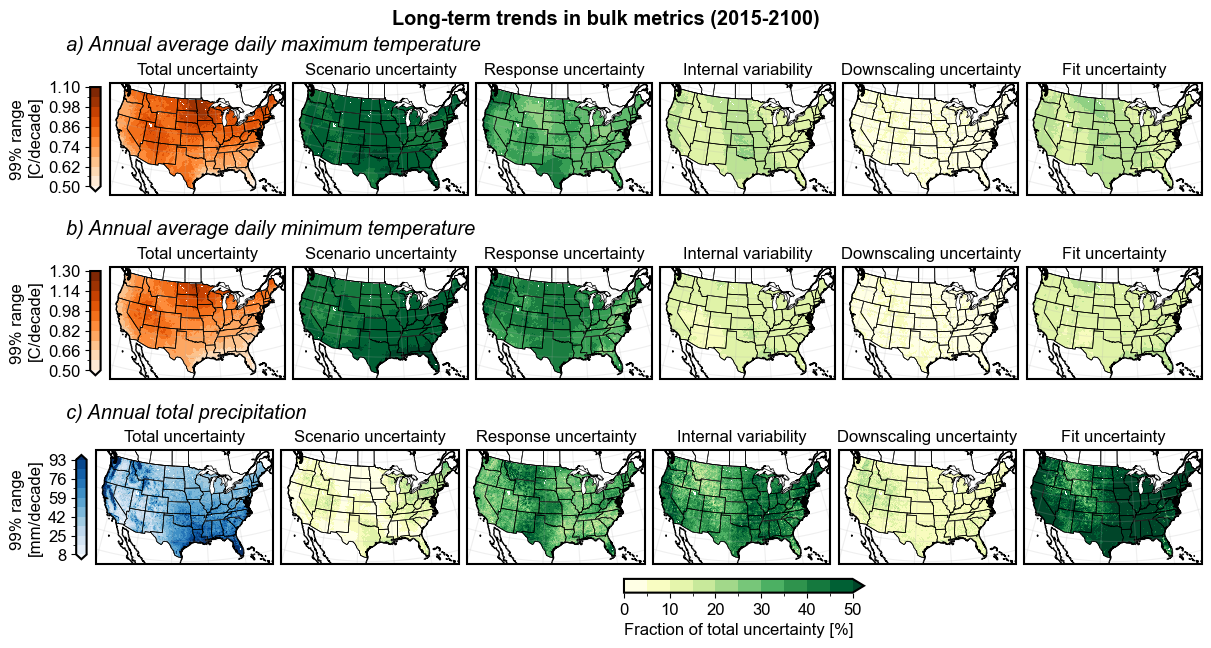

In [9]:
# Main plot
proj_slice = '2015-2100'
return_period = None
grid = 'LOCA2'
norm = 'uc_99w_main'

fig = plt.figure(figsize=(12, 5.5), layout='constrained')
subfigs = fig.subfigures(3, 1, hspace=0.01)

fig.suptitle("Long-term trends in bulk metrics (2015-2100)", fontweight="bold", y=1.07)

# Loop through metrics
plot_metric_ids = ['avg_tasmax', 'avg_tasmin', 'sum_pr']
for idp, metric_id in enumerate(plot_metric_ids):
    axs = subfigs[idp].subplots(1, 6, subplot_kw=dict(projection=ccrs.LambertConformal()))
    p = pu.plot_uc_map(
        metric_id=metric_id,
        proj_slice=proj_slice,
        hist_slice=None,
        plot_col="slope",
        return_period=None,
        grid=grid,
        fit_method=None,
        stationary=None,
        time_str = None,
        norm=norm,
        analysis_type="trends",
        vmax_uc = 50,
        fig=subfigs[idp],
        title = pu.subfigure_labels[idp],
        axs=axs,
        y_title=1.07,
        plot_fit_uc=True
    )

# Create a new axes for the colorbar at the bottom
cbar_ax = fig.add_axes([0.515, 0.01, 0.2, 0.025])  # [left, bottom, width, height]

# Add colorbar using the stored mappable
cbar = fig.colorbar(p, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Fraction of total uncertainty [%]')
    
plt.savefig('../figs/main/final/figure2.png', dpi=300, bbox_inches='tight')